# Neurips Analysis Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Globals

In [2]:
point_sizes = [10, 20, 30, 40, 50 , 60, 70, 80]#80, 100] #, 100]

entropy_file = "entropy"
eigenvalue_file = "eigenvalues"
losses_file = "losses"
accuracy_file = "accuracy"

In [3]:
def load_data(file_type: str):
    """
    Load data from all of the experiments for 
    a specific property.
    
    Parameters
    ----------
    file_type : str
            The data you want loaded. Choose from the variables:
                - entropy_file
                - eigenvalue_file
                - losses_file
    Returns
    -------
    data : dict
            Dictionary of the data {"10": ..., "20": ...}
    """
    prefix = "/tikhome/stovey/work/Repositories/ZINCWARECODE/ZnRND/examples/neurips/"
    data = {}
    for item in point_sizes:
        data[str(item)] = np.load(
            f"{item}_analysis/{file_type}_{item}.npy", 
            allow_pickle=True
        )
        
    return data
        

### Entropy Study

In [4]:
entropy_data = load_data(entropy_file)

In [5]:
plot_data = {"rnd": [], "random": []}
error_data = {"rnd": [], "random": []}
for value in entropy_data.values():
    for item in value.item():
        plot_data[item].append(value.item()[item][0])
        error_data[item].append(value.item()[item][1])

/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


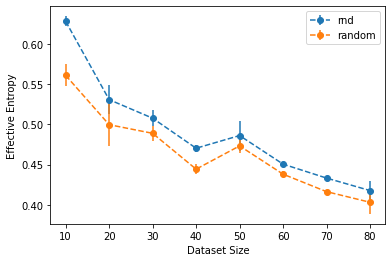

In [6]:
for item in ["rnd", "random"]:
    plt.errorbar(
        point_sizes, 
        plot_data[item], 
        yerr=error_data[item], 
        label=item,
        marker='o',
        linestyle="--"
    )
plt.xlabel("Dataset Size")
plt.ylabel("Effective Entropy")
# plt.yscale("log")
plt.legend() 
plt.show()

### Eigenvalue Study

In [7]:
eigenvalue_data = load_data(eigenvalue_file)

In [8]:
plot_data = {"rnd": [], "random": []}
error_data = {"rnd": [], "random": []}
for value in eigenvalue_data.values():
    for item in value.item():
        plot_data[item].append(value.item()[item][0])
        error_data[item].append(value.item()[item][1])

/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the 

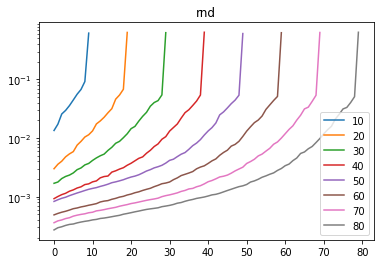

/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tikhome/stovey/miniconda3/envs/zincware/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the 

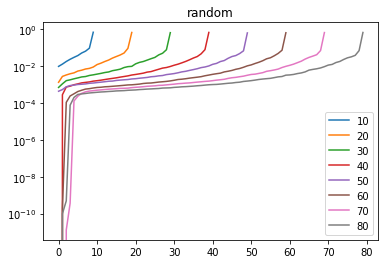

In [9]:
for item in ["rnd", "random"]:
    for i in range(len(point_sizes)):
        plt.plot(plot_data[item][i], label=point_sizes[i])

    plt.yscale("log")
    plt.legend()
    plt.title(item)
    plt.show()


### Model Performance

In [10]:
model_data = load_data(losses_file)

In [11]:
plot_data = {"rnd": [], "random": []}
error_data = {"rnd": [], "random": []}
for value in model_data.values():
    for item in value.item():
        plot_data[item].append(value.item()[item][0])
        error_data[item].append(value.item()[item][1])

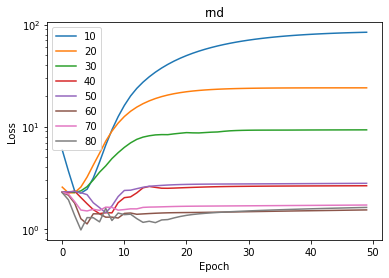

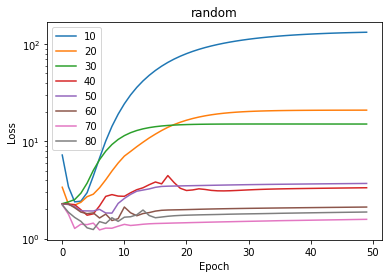

In [12]:
for item in ["rnd", "random"]:
    for i in range(len(point_sizes)):
        plt.plot(plot_data[item][i], label=point_sizes[i])
    
    plt.yscale("log")
    plt.title(item)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

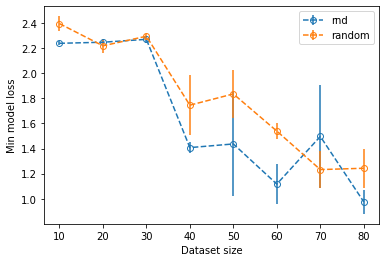

In [13]:
for item in ["rnd", "random"]:
    dat = []
    err = []
    for errors, dataset in zip(error_data[item], plot_data[item]):
        min_val = np.argmin(dataset)
        dat.append(dataset[min_val])
        err.append(errors[min_val])
    plt.errorbar(point_sizes, dat, yerr=err, marker='o', mfc='none', linestyle='--', label=item)

plt.xlabel("Dataset size")
plt.ylabel("Min model loss")
plt.legend()
plt.show()


### Model Accuracy

In [14]:
model_data = load_data(accuracy_file)

In [15]:
plot_data = {"rnd": [], "random": []}
error_data = {"rnd": [], "random": []}
for value in model_data.values():
    for item in value.item():
        plot_data[item].append(value.item()[item][0])
        error_data[item].append(value.item()[item][1])

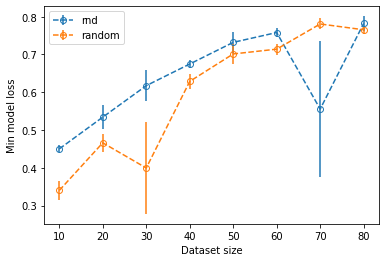

In [16]:
for item in ["rnd", "random"]:
    dat = []
    err = []
    for errors, dataset in zip(error_data[item], plot_data[item]):
        min_val = np.argmax(dataset)
        dat.append(dataset[min_val])
        err.append(errors[min_val])
    plt.errorbar(
        point_sizes, dat, yerr=err, marker='o', mfc='none', linestyle='--', label=item
    )

plt.xlabel("Dataset size")
plt.ylabel("Min model loss")
plt.legend()
plt.show()